<a href="https://colab.research.google.com/github/AtharvaPhansalkar/Bank-Deposit-Classifier/blob/master/Bank%20Deopsit%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##THIS IS A PROJECT BASED ON MACHINE LEARNING WHICH PREDCITS IF SOMEONE WILL OPEN AN ACCOUNT FOR DEPOSIT AT A PORTUGUESE BANK. 

In [ ]:
  ##LOADING THE TWO DATSETS FOR OUR PROJECT

In [ ]:
from google.colab import files
uploadlive = files.upload()

Saving live.csv to live.csv


In [ ]:
#NOW , UPLOADING THE SECOND DATASET ON WHICH WE WILL RUN THE PREDICTIONS

In [ ]:
from google.colab import files
upload = files.upload()

Saving bankf.csv to bankf.csv


In [ ]:
##IMPORTING THE DIFFERENT LIBRARIES WE'LL BE REQUIRING FOR THE PROJECT

'''
THE MAIN LIBRARIES BEING : 

1)SK LEARN : HAS ALL THE MACHINE LEARNING TOOLS , PROCESSES AND ALGOS 

2)NUMPY : USED FOR MATHEMATICAL OPS ON LARGE ARRAYS AND VECTORS

3)PANDAS : ACTS LIKE SQL FOR PYTHON , FIND , TRAVERSE AND MANIPULATE DATA

4)SEABORN AND MATPLOTLIB : MAJOR LIBRARIES FOR PLOTTING GRAPHS

'''

In [ ]:
import numpy as np
import sklearn 	
import pandas as pd
import csv
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import xgboost

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import datasets,linear_model
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline,FeatureUnion,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
	
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix


In [ ]:
##NOW READING THE DATABASES (CSV FILES):

final=pd.read_csv('live.csv') ##OUR TRAINING DATASET

test=pd.read_csv('bankf.csv') ##TESTING DATSET


In [ ]:
##RENAMING THE DEPOSIT COLUMN (TARGET) TO 'y' , YES/NO , SAME AS THAT OF THE TESTING DATASET


final = final.rename({'deposit': 'y'}, axis=1)
final = final.rename({'campaign': 'camp'}, axis=1)


In [ ]:
#Fetching some rows from the TRAINING dataset 
final.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,camp,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [ ]:
#CHECKING FOR NULL VALUES AND COLUMN TYPE

final.info()
print('SHOWS NO NULL VALUES IN ANY ROW')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  camp       11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
SHOWS NO NULL VALUES IN ANY ROW


In [ ]:
#We check for any duplicate rows
res = final.drop_duplicates() ##THIS CMD WILL DROP ANY ROWS THAT ARE COMPLETELY IDENTICAL
print(res)

print('We dont see any reduction in rows , thus no duplicates')

       age          job  marital  education  ... pdays  previous poutcome    y
0       59       admin.  married  secondary  ...    -1         0  unknown  yes
1       56       admin.  married  secondary  ...    -1         0  unknown  yes
2       41   technician  married  secondary  ...    -1         0  unknown  yes
3       55     services  married  secondary  ...    -1         0  unknown  yes
4       54       admin.  married   tertiary  ...    -1         0  unknown  yes
...    ...          ...      ...        ...  ...   ...       ...      ...  ...
11157   33  blue-collar   single    primary  ...    -1         0  unknown   no
11158   39     services  married  secondary  ...    -1         0  unknown   no
11159   32   technician   single  secondary  ...    -1         0  unknown   no
11160   43   technician  married  secondary  ...   172         5  failure   no
11161   34   technician  married  secondary  ...    -1         0  unknown   no

[11162 rows x 17 columns]
We dont see any reduction

In [ ]:
#Checking for misssing values , I.E THAT ARE BLANK AND DONT HAVE ANY DATA

print(final.isnull().sum())
print("NO NULL OR MISSING VALUES")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
camp         0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
NO NULL OR MISSING VALUES


In [ ]:
##NOW WE'LL CONVERT THE OBJECT COLUMNS OF THE TRAINING DATSET TO CATEGORICAL VALUES FOR CLASSIFICATION.

finalob=pd.read_csv('live.csv')

for col in finalob.columns:
    if finalob[col].dtype==object:
           finalob[col]=finalob[col].astype('category')
           finalob[col]=finalob[col].cat.codes

print(final.head(3))
print(finalob.head(3))

finalob = finalob.rename({'deposit': 'y'}, axis=1)
finalob = finalob.rename({'campaign': 'camp'}, axis=1)

print('ALL THE STRING VALUES HAVE BEEN CONVERTED TO CATEGORICAL MATRICES FOR CLASSIFICATION')

   age         job  marital  education  ... pdays  previous poutcome    y
0   59      admin.  married  secondary  ...    -1         0  unknown  yes
1   56      admin.  married  secondary  ...    -1         0  unknown  yes
2   41  technician  married  secondary  ...    -1         0  unknown  yes

[3 rows x 17 columns]
   age  job  marital  education  ...  pdays  previous  poutcome  deposit
0   59    0        1          1  ...     -1         0         3        1
1   56    0        1          1  ...     -1         0         3        1
2   41    9        1          1  ...     -1         0         3        1

[3 rows x 17 columns]
ALL THE STRING VALUES HAVE BEEN CONVERTED TO CATEGORICAL MATRICES FOR CLASSIFICATION


Customers acquired = 5289
Total Targets = 11162


<Figure size 432x288 with 0 Axes>

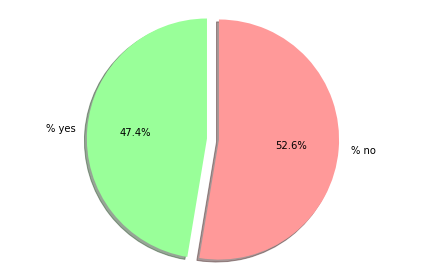

In [ ]:
#query geneation for specific rows

#total number of DEPOSTIS acquired
(final.loc[ (final['y']=='yes')])

print('Customers acquired =',len((final.loc[ (final['y']=='yes')])))
print('Total Targets =',len(final['age']))

#print('% acquired =',11.265417111)
plt.figure()

colors = ['#99ff99','#ff9999','#66b3ff','#ffcc99']
plt.rcParams['figure.figsize'] = (6, 4)

labels = ['% yes', '% no']
sizes = [47.38,52.62]# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1,)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

In [ ]:
''' THE PANDAS COMMANDS HASHED BELOW ARE USEFUL FOR TRAVERSING DATA , FINDING USEFUL INFO 

#print('min age success =',(doc.loc[ (doc['y']=='yes')] & ((doc['age']==min(doc['age'])))))
#sets.loc[(sets['Market_dist']>=10000) & (sets['Parking_type']=='Covered') & (sets['City_type']=="CAT B")]
#print(tempframe.loc[ (tempframe['y']=='yes') & (tempframe['age']==17)])
#print(tempframe.loc[ (tempframe['y']=='yes') & (tempframe['age']==98)])

'''

#creating a temp dataset which only inlcudes confirmed depositers
finalframe=(final.loc[(final['y']=='yes')])
print(finalframe.head(7))

print('THE FINALFRAME CAN BE CONSIDERED AS A MINI DATABASE WHICH CONTAINS THE VALUES OF PEOPLE WHO HAVE AGREED FOR DEPOSIT')

   age         job  marital  education  ... pdays  previous poutcome    y
0   59      admin.  married  secondary  ...    -1         0  unknown  yes
1   56      admin.  married  secondary  ...    -1         0  unknown  yes
2   41  technician  married  secondary  ...    -1         0  unknown  yes
3   55    services  married  secondary  ...    -1         0  unknown  yes
4   54      admin.  married   tertiary  ...    -1         0  unknown  yes
5   42  management   single   tertiary  ...    -1         0  unknown  yes
6   56  management  married   tertiary  ...    -1         0  unknown  yes

[7 rows x 17 columns]
THE FINALFRAME CAN BE CONSIDERED AS A MINI DATABASE WHICH CONTAINS THE VALUES OF PEOPLE WHO HAVE AGREED FOR DEPOSIT


In [ ]:
'''NOW WE'LL TAKE A LOOK AT THE VARIOUS COLUMNS OF OUR DATSET'''

min age target = 18
max age target = 95
min acquired customer age = 18
max acquired customer age = 95
count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64
THE LAST FEW OBSERVATIONS FOR THE ACQUIRED CUSTOMERS IN AGE COLUMN MAY BE OUTLIERS


<Figure size 432x288 with 0 Axes>

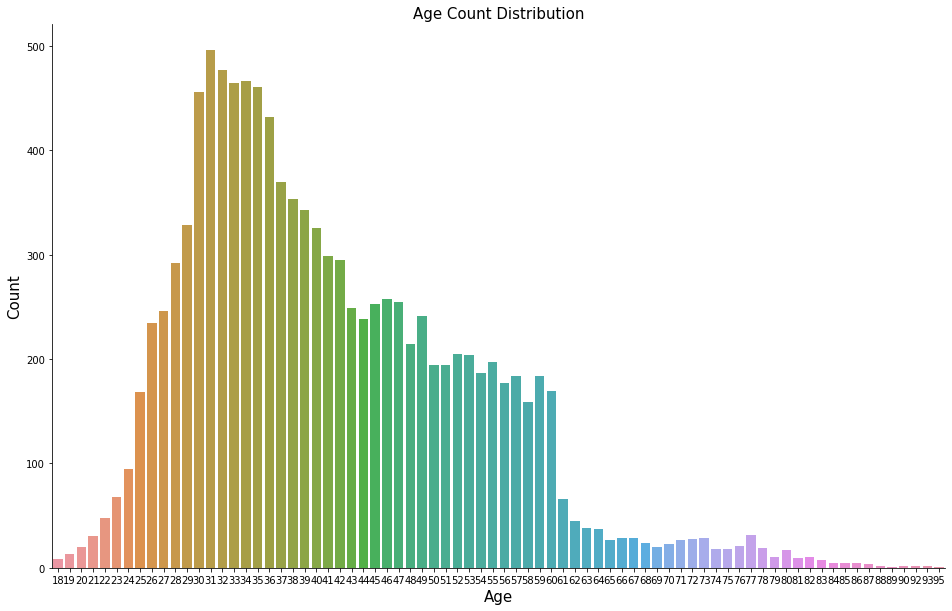

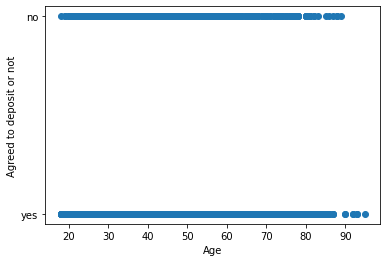

In [ ]:
#checking min and max age for people targeted 

print('min age target =',min(final['age']))
print('max age target =',max(final['age']))



#finding the min and max age of depositers
print('min acquired customer age =',min(finalframe['age']))
print('max acquired customer age =',max(finalframe['age']))

plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(16, 10)
sns.countplot(x = final['age'], data = final)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()


plt.figure()
plt.rcParams['figure.figsize'] = (9, 4)

plt.xlabel('Age')
plt.ylabel('Agreed to deposit or not')
plt.scatter(final['age'],final['y'])


print(final['age'].describe())

print("THE LAST FEW OBSERVATIONS FOR THE ACQUIRED CUSTOMERS IN AGE COLUMN MAY BE OUTLIERS")


In [ ]:
print("WE CAN SEE FEW CUSTOMERS WITH AGE MORE THAN 95 , LETS SEE THE TOTAL NUMBER OF PEOPLE ABOVE 90 WHO DEPOSIT")

print(final.loc[(final['age']>=90)])

print("WE HAVE 7 RETIRED PEOPLE WITH AGE ABOVE 90 AS DEPOSITERS WITH THE MOST FREQUENT BALANCE BEING 700-800 , THUS THEY REPRESENT A CRUCICAL PART FOR CLASSIFICATION ")

WE CAN SEE FEW CUSTOMERS WITH AGE MORE THAN 95 , LETS SEE THE TOTAL NUMBER OF PEOPLE ABOVE 90 WHO DEPOSIT
      age      job   marital  education  ... pdays  previous poutcome    y
1243   90  retired  divorced  secondary  ...    -1         0  unknown  yes
1582   95  retired  divorced    primary  ...    -1         0  unknown  yes
2802   92  retired   married    unknown  ...    -1         0  unknown  yes
3098   92  retired   married    unknown  ...    96         3  success  yes
3292   90  retired  divorced    primary  ...    -1         0  unknown  yes
3756   93  retired   married    unknown  ...   177         7  success  yes
3822   93  retired   married    unknown  ...    13         9  success  yes

[7 rows x 17 columns]
WE HAVE 7 RETIRED PEOPLE WITH AGE ABOVE 90 AS DEPOSITERS WITH THE MOST FREQUENT BALANCE BEING 700-800 , THUS THEY REPRESENT A CRUCICAL PART FOR CLASSIFICATION 


THE DIFFERENT JOBS ARE : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


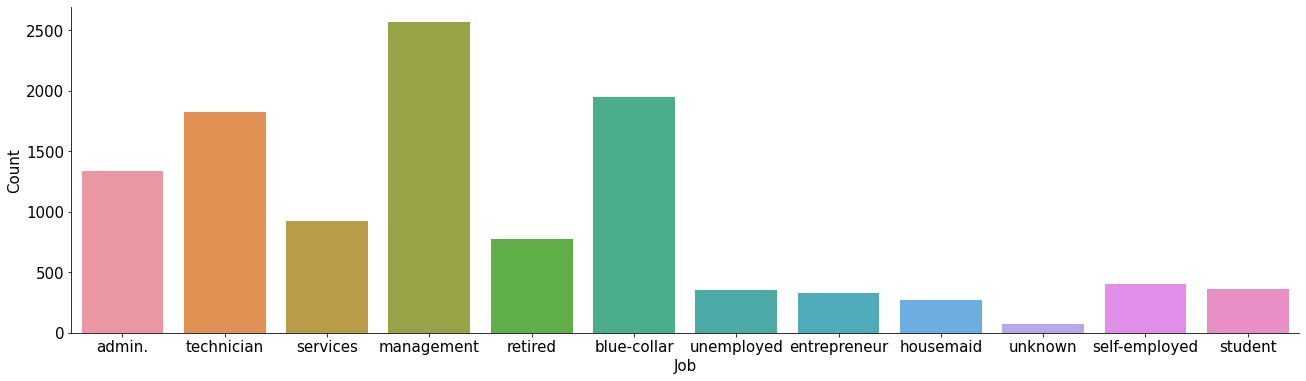

In [ ]:
#JOBS COLUMN
print('THE DIFFERENT JOBS ARE :',final['job'].unique())

#print(doc['job'].groupbydescribe())
#print(doc['y'].groupby

fig, ax = plt.subplots()
fig.set_size_inches(22, 6)
sns.countplot(x = 'job', data = final)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
#ax.set_title('Age Count Distribution, fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

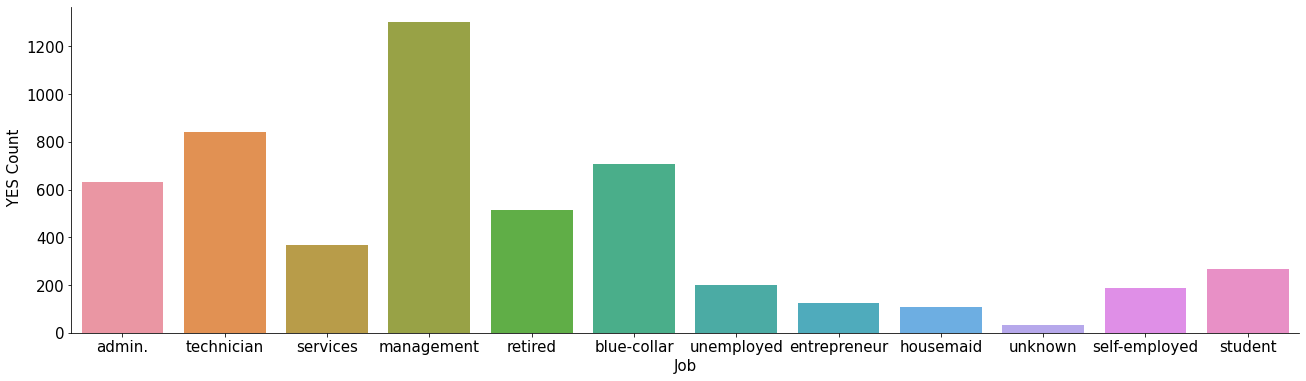

In [ ]:
#LETS SEE THE YES COUNT VS THE JOB PROFILE 

plt.figure
fig, ax = plt.subplots()
fig.set_size_inches(22, 6)
sns.countplot(x = 'job', data = finalframe)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel(' YES Count', fontsize=15)
#ax.set_title('Age Count Distribution, fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [ ]:
table = pd.crosstab(index=final["y"], 
                             columns=[final["job"],final['marital']],margins=True)   # Include row and column totals

(table)

job       admin.                blue-collar  ...  unknown                   All
marital divorced married single    divorced  ... divorced married single       
y                                            ...                               
no            92     371    240          91  ...        1      28      7   5873
yes           90     306    235          58  ...        1      21     12   5289
All          182     677    475         149  ...        2      49     19  11162

[3 rows x 37 columns]

different marital status = ['married' 'single' 'divorced']
No of customers married = 2755
No of customers single = 1912
No of customers divorced = 622
No of customers with unknown status = 0


<Figure size 648x288 with 0 Axes>

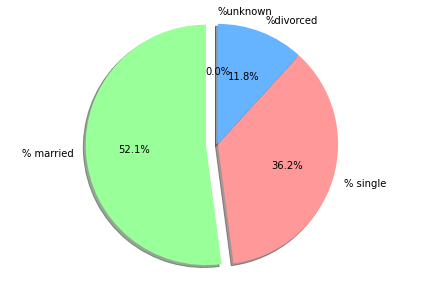

<Figure size 432x288 with 0 Axes>

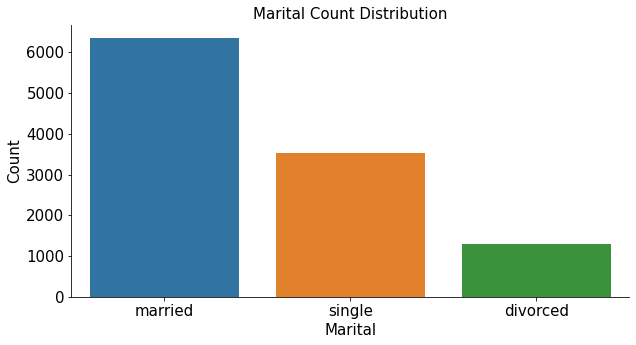

In [ ]:
#CHECKING FOR DIFFERENT VALUES IN THE MARRIED COLUMN

print('different marital status =',final['marital'].unique())

print('No of customers married =',len(finalframe.loc[(finalframe['marital']=='married')]))

print('No of customers single =',len(finalframe.loc[(finalframe['marital']=='single')]))

print('No of customers divorced =',len(finalframe.loc[(finalframe['marital']=='divorced')]))

print('No of customers with unknown status =',len(finalframe.loc[(finalframe['marital']=='unknown')]))

plt.figure()

colors = ['#99ff99','#ff9999','#66b3ff','#ffcc99']
plt.rcParams['figure.figsize'] = (6, 4)

labels = ['% married','% single','%divorced','%unknown']
sizes = [52.08,36.15,11.76,0.0]# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = final)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()



In [ ]:
print('Profiling for the MARITAL AND AGE GROUP')
age_group_names = ['young', 'lower middle', 'middle', 'senior']
final['agegroups'] = pd.qcut(final['age'], 4, labels = age_group_names)
gb_marital_age = final['y'].groupby([final['marital'],final['agegroups']] ) 
print(gb_marital_age.value_counts())

print("THE MAX SUBSCRIBERS ARE MARRIED SENIORS AND SINGLE YOUNG PEOPLE")

Profiling for the MARITAL AND AGE GROUP
marital   agegroups     y  
divorced  young         no       53
                        yes      43
          lower middle  no      153
                        yes     126
          middle        no      238
                        yes     175
          senior        yes     278
                        no      227
married   young         no      525
                        yes     349
          lower middle  no      985
                        yes     687
          middle        no     1116
                        yes     678
          senior        yes    1041
                        no      970
single    young         yes    1180
                        no      830
          lower middle  no      482
                        yes     456
          middle        no      211
                        yes     210
          senior        no       83
                        yes      66
Name: y, dtype: int64
THE MAX SUBSCRIBERS ARE MARRIED SENIORS AND SI

<Figure size 432x288 with 0 Axes>

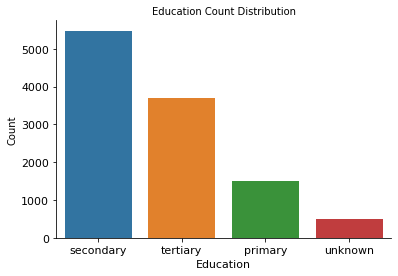

In [ ]:
#EDUCATION COLUMN
plt.figure()

ig, ax = plt.subplots()
fig.set_size_inches(60, 200)
sns.countplot(x = 'education', data = final)
ax.set_xlabel('Education', fontsize=11)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education Count Distribution', fontsize=10)
ax.tick_params(labelsize=11)
sns.despine()

#print(final['marital'].groupby([final['education'],final['y']]).describe())

table = pd.crosstab(index=final["y"], 
                             columns=[final["education"]],margins=True)  



In [ ]:
table = pd.crosstab(index=final["y"], 
                             columns=[final["education"]],margins=True)  
print(table)

print("IT SHOWS US HERE THAT THE MORE EDUCATED A PERSON IS , THE MORE LIKELY HE WILL BE OPTING FOR A DEPOSIT ")

education  primary  secondary  tertiary  unknown    All
y                                                      
no             909       3026      1693      245   5873
yes            591       2450      1996      252   5289
All           1500       5476      3689      497  11162
IT SHOWS US HERE THAT THE MORE EDUCATED A PERSON IS , THE MORE LIKELY HE WILL BE OPTING FOR A DEPOSIT 


In [ ]:
##THIS TABLE SHOWS DIFFERENT JOBS AND EDUCATION GROUPS AND THEIR STATS FOR DEPOSITS

table = pd.crosstab(index=final["y"], 
                             columns=[final["education"],final['job']],margins=True)  
table

education primary                           ...    unknown            All
job        admin. blue-collar entrepreneur  ... unemployed unknown       
y                                           ...                          
no             30         476           29  ...          3      21   5873
yes            12         218           12  ...          4      18   5289
All            42         694           41  ...          7      39  11162

[3 rows x 49 columns]

In [ ]:
## MOVING ON TO THE COLUMNS OF HOUSING ,DEFAULT AND LOAN i.e Credit Profile 

##AN OBVIOUS COLCLUSION WOULD BE THAT SOMEONE WHO's A CONSTANT DEFAULTER AND HAS LOANS WOULD LIKE TO MAINTAIN LIQUIDITY 
#AND KEEP OUT OF HUGE TERM DEPOSITS UNLESS THE INTEREST RATE BEING OFFERED IS REALLY GOOOD.

PEOPLE WITH STRONG CREDIT PROFILE , NO DEFAULT AND LESS LOANS ARE THE POSSIBLE CUSTOMERS


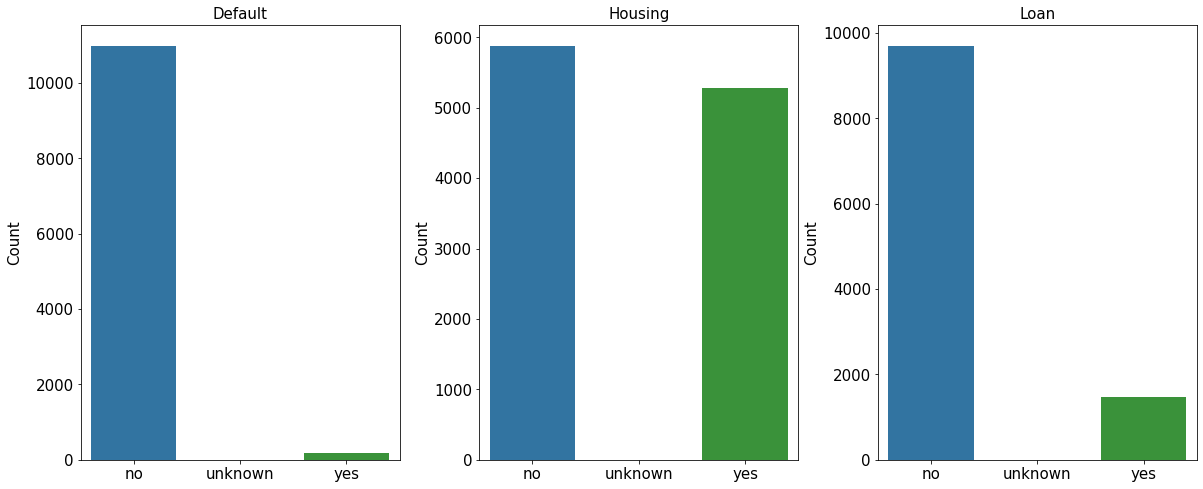

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = final, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = final, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = final, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

print("PEOPLE WITH STRONG CREDIT PROFILE , NO DEFAULT AND LESS LOANS ARE THE POSSIBLE CUSTOMERS")

In [ ]:
finalframe.loc[(finalframe['housing']>='yes') ]

print("NO OF CUSTOMERS WITH HOUSING LOAN  ----> 1935 PEOPLE \n") #3354

finalframe.loc[(finalframe['housing']=='yes')&(finalframe['loan']=='yes') ]
print("NO OF CUSTOMERS WITH PERSONAL LOAN ---> 484\n")

print("NO OF CUSTOMERS WITH HOUSING LOAN AND PERSONAL LOAN ---> 265\n")



print('% of CUSTOMERS WITH HOUSING LOAN : ',((1935/5289)*100),'\n')
print('% of CUSTOMERS WITH PERSONAL LOAN : ',((484/5289)*100),'\n')
print('% of CUSTOMERS WITH HOUSING LOAN AND PERSONAL LOAN : ',((265/5289)*100),'\n')

print('''THUS NO STRONG TREND CAN BE DEFINED WITH INFO RELATED TO LOANS 

AN OBVIOUS CONCLUSION WILL BE THAT A PERSON WITH MULTIPLE LOANS WONT BE ABLE TO KEEP CASH ASIDE AS HE NEEDS TO PAY HIS DUES''')

NO OF CUSTOMERS WITH HOUSING LOAN  ----> 1935 PEOPLE 

NO OF CUSTOMERS WITH PERSONAL LOAN ---> 484

NO OF CUSTOMERS WITH HOUSING LOAN AND PERSONAL LOAN ---> 265

% of CUSTOMERS WITH HOUSING LOAN :  36.58536585365854 

% of CUSTOMERS WITH PERSONAL LOAN :  9.151068254868596 

% of CUSTOMERS WITH HOUSING LOAN AND PERSONAL LOAN :  5.010398941198714 

THUS NO STRONG TREND CAN BE DEFINED WITH INFO RELATED TO LOANS 

AN OBVIOUS CONCLUSION WILL BE THAT A PERSON WITH MULTIPLE LOANS WONT BE ABLE TO KEEP CASH ASIDE AS HE NEEDS TO PAY HIS DUES


% of SUCCESSFUL TELEPHONIC ATTEMPTS :  50.3875968992248 

% of SUCCESSFUL CELLULAR ATTEMPTS :  54.327281770703806 

% of SUCCESSFUL UNKNOWN ATTEMPTS :  22.59164535379369 

WE CAN SAY THAT CELLULAR ATTEMPT HAS BEEN A BIT BETTER BUT ITS TOO 1-DIMENSIONAL TO CONCLUDE ANYTHING ,
WHILE THE NUMBER OF CELLULAR ATTEMPTS ARE HUGE , CONVERSION RATE ISNT DEPENDENT ON THAT


<Figure size 432x288 with 0 Axes>

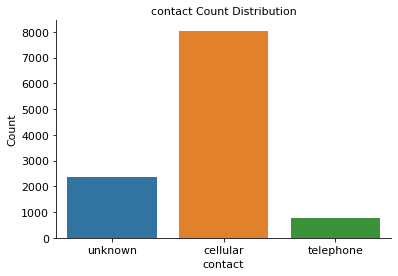

In [ ]:
##FOR THE CONTACT COLUMN
plt.figure()

ig, ax = plt.subplots()
fig.set_size_inches(60, 200)
sns.countplot(x = 'contact', data = final)
ax.set_xlabel('contact', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.set_title('contact Count Distribution', fontsize=11)
ax.tick_params(labelsize=11)
sns.despine()

#tempframe.loc[(tempframe['contact']=='cellular') ]
 #783 15044 26144 3853

print('% of SUCCESSFUL TELEPHONIC ATTEMPTS : ',((390/774)*100),'\n')
print('% of SUCCESSFUL CELLULAR ATTEMPTS : ',((4369/8042)*100),'\n')
print('% of SUCCESSFUL UNKNOWN ATTEMPTS : ',((530/2346)*100),'\n')
print('''WE CAN SAY THAT CELLULAR ATTEMPT HAS BEEN A BIT BETTER BUT ITS TOO 1-DIMENSIONAL TO CONCLUDE ANYTHING ,
WHILE THE NUMBER OF CELLULAR ATTEMPTS ARE HUGE , CONVERSION RATE ISNT DEPENDENT ON THAT''')



month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,All
y,,,,,,,,,,,,,
no,346,831,10,335,202,887,676,28,1899,540,69,50,5873
yes,577,688,100,441,142,627,546,248,925,403,323,269,5289
All,923,1519,110,776,344,1514,1222,276,2824,943,392,319,11162


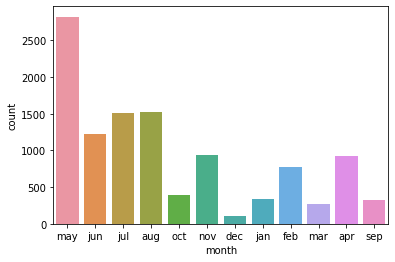

In [ ]:
##FOR THE MONTH COLUMN

final['month'].unique()

final['month'].describe()

plt.figure()
sns.countplot(x = 'month', data = final)
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

table = pd.crosstab(index=final["y"], 
                             columns=[final['month']],margins=True)  
(table)

In [ ]:
##FOR THE CAMPAIGN COLUMN 

Text(0, 0.5, 'yes=1/ no=0')

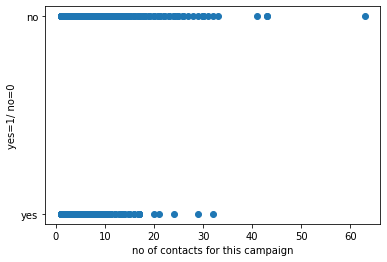

In [ ]:
plt.figure()

finalob['y']=finalob['y'].astype('float')
plt.rcParams['figure.figsize'] = (9, 6)
plt.scatter(final['camp'],final['y'])
plt.xlabel('no of contacts for this campaign')
plt.ylabel('yes=1/ no=0')

#sns.boxplot(x=doc['camp'],y=doc['y'])
#x1 = doc['camp']
#x2 = doc['camp']
##y1 = doc['y']
#y2 = doc['y']

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6),squeeze=False)
#axes[0].scatter(x1, y1)
#axes[1].scatter(x2, y2)
#fig.tight_layout()



THE OUTLIERS WHICH WE ARE GETTING HERE INCLUDE A LOT OF OBSERVATIONS AND SHOW POTENTIAL CUSTOMERS , THUS EXCLUDING THEM DOESNT LOOK APPROPIRATE


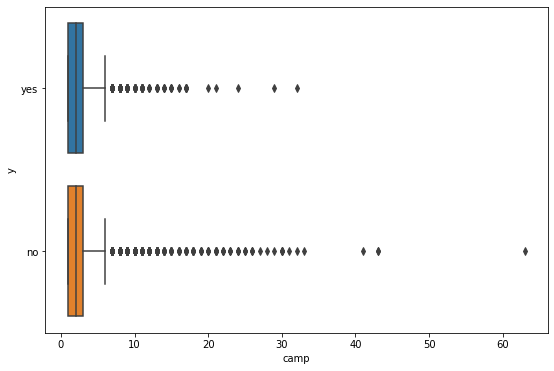

In [ ]:
#IF WE LOOK FOR OUTLIERS IN THE CAMP COLUMN
plt.figure()

sns.boxplot(x=final['camp'],y=final['y'])

print("THE OUTLIERS WHICH WE ARE GETTING HERE INCLUDE A LOT OF OBSERVATIONS AND SHOW POTENTIAL CUSTOMERS , THUS EXCLUDING THEM DOESNT LOOK APPROPIRATE")

Text(0, 0.5, 'yes no')

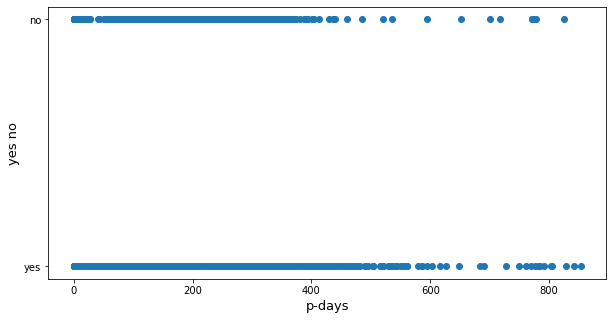

In [ ]:
## WE SET THE PDAYS =0 WHERE THE PERSON HASNT BEEN PREVIOUSLY CONTACTED

#doc.loc[doc['pdays']==999,'pdays']=0
#doc.head(3)

final.loc[final['pdays']==-1,'pdays']=0
finalob.loc[finalob['pdays']==-1,'pdays']=0


plt.figure(figsize=(10,5))
plt.scatter(final.pdays,final.y)
plt.xlabel("p-days", fontsize=13)
plt.ylabel("yes no", fontsize=13)

#WE'LL TRY TO GET THE RELATIONSHIP BETWEEN THESE FEATURES AND THE TARGET BY OTHER METHODS AS NO CONCRETE ANALYSIS CAN BE FOUND

In [ ]:
#PREVIOUS COLUMN 


#plt.figure(figsize=(8,5))
##ig, ax = plt.subplots()
#fig.set_size_inches(60, 200)
#sns.countplot(x = 'previous', data = doc)
#ax.set_xlabel('previous', fontsize=11)
#ax.set_ylabel('Count', fontsize=11)
#ax.set_title('previous Count Distribution', fontsize=11)
#ax.tick_params(labelsize=11)
#sns.despine()

#print("ITS EVIDENT THAT MOSTLY NEW PEOPLE ARE TARGETED ")

print(final['y'].groupby(final['previous']).describe())

print("THE MAX NUMBER OF ATTEMPTS HAVE BEEN FOR NEW CUSTOMERS")


         count unique  top  freq
previous                        
0         8324      2   no  4940
1          887      2  yes   583
2          693      2  yes   456
3          435      2  yes   294
4          244      2  yes   171
5          165      2  yes   121
6          117      2  yes    83
7           77      2  yes    54
8           60      2  yes    39
9           34      2  yes    24
10          30      2  yes    26
11          23      2  yes    15
12          16      2  yes    10
13          11      2  yes     9
14           6      2  yes     5
15           5      2   no     4
16           2      1   no     2
17          11      2   no     8
18           1      1   no     1
19           4      2  yes     2
20           2      2  yes     1
21           1      1  yes     1
22           1      1  yes     1
23           2      2  yes     1
26           1      1  yes     1
27           2      1   no     2
28           1      1   no     1
29           1      1  yes     1
30        

EVEN AFTER A SUCCESSFUL CAMPAIGN , CHANCE OF LOSING OF A POTENTIAL CUSTOMER = 8.683473389355742 %

CHANCE OF DEPOSIT EVEN AFTER A FAILURE IN CAMPAIGN = 50.3257328990228 %

SUCCESS WHEN OUTCOME ISNT KNOWN = 40.66778765313476 %

SUCCESS WHEN OUTCOME --> OTHER = 57.16945996275605 %

THERE IS A 50-50  POSSIBILITY THAT THE POUTCOME DOESNT DETERMINE WHETHER SOMEONE WILL DEPOSIT OR NOT,
      AFTER A POSITIVE OUTCOME POUTCOME , CHANCE OF LOSING THE CUSTOMER IS VERY LESS


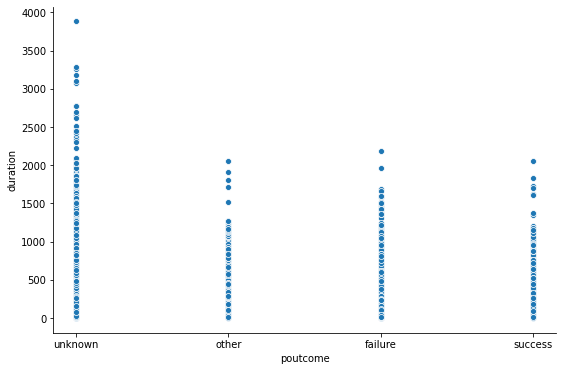

In [ ]:
##P OUTCOME 
#print(doc['poutcome'].unique())

#print(final.loc[(doc['poutcome']=='success') & (doc['y']=='yes')  ]) #978 #93

#print(final.loc[(doc['poutcome']=='nonexistent') & (doc['y']=='yes')  ]) #3386 #4940

#print(final.loc[(doc['poutcome']=='failure') & (doc['y']=='yes')  ]) #618 #610


print("EVEN AFTER A SUCCESSFUL CAMPAIGN , CHANCE OF LOSING OF A POTENTIAL CUSTOMER =",((93/(93+978))*100),'%\n')

print("CHANCE OF DEPOSIT EVEN AFTER A FAILURE IN CAMPAIGN =",(618/(610+618)*100),'%\n')

print("SUCCESS WHEN OUTCOME ISNT KNOWN =",(3386/(3386+4940)*100),'%\n')

print("SUCCESS WHEN OUTCOME --> OTHER =",(307/(537)*100),'%\n')

plt.figure()
sns.scatterplot(x =final['poutcome'], y=final['duration'])
ax1.set_xlabel('contact', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title('contact Count Distribution', fontsize=11)
ax1.tick_params(labelsize=11)
sns.despine()



print('''THERE IS A 50-50  POSSIBILITY THAT THE POUTCOME DOESNT DETERMINE WHETHER SOMEONE WILL DEPOSIT OR NOT,
      AFTER A POSITIVE OUTCOME POUTCOME , CHANCE OF LOSING THE CUSTOMER IS VERY LESS''')

PEOPLE WITH MORE BALANCE ARE MORE LIKELY TO OPEN A DEPOSIT WITH THE BANK


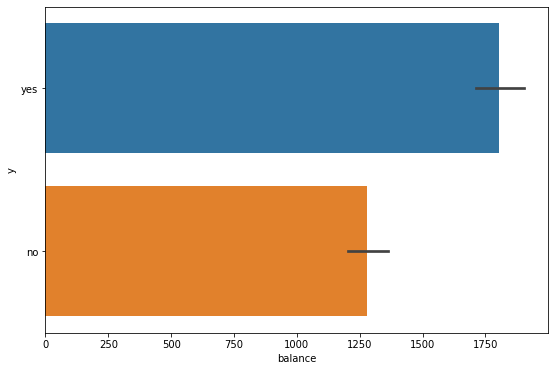

In [ ]:
## FOR THE BALANCE COLUMN

#bal=pd.qcut(final['balance'],3,labels=['low','medium','high'])



#print(final['balance'].describe())

plt.figure()
sns.barplot(finalob.balance,final['y'])


print("PEOPLE WITH MORE BALANCE ARE MORE LIKELY TO OPEN A DEPOSIT WITH THE BANK")

In [ ]:

##NOW WE'LL BE MOVING FOR THE TRAINING OF MODELS AND ALSO CREATING AN IMPUTED DATASET FOR OTHER CLASSIFICATION

In [ ]:
##CREATING A IMPUTED DATASET OF THE ORIGNAL ONE

finalimp=pd.read_csv('live.csv')

finalimp.loc[finalimp['pdays']==-1,'pdays']=0 ##SETTING PDAYS =0 WHEREVER THEY ARE -1

finalimp.loc[finalimp['job']=='unknown','job']='management' ## REPLACING unknowns WITH THE MODE , MANAGEMENT

finalimp.loc[finalimp['education']=='unknown','education']='secondary' ##SAME WITH EDUCATION



for col in finalimp.columns:
    if finalimp[col].dtype==object:
           finalimp[col]=finalimp[col].astype('category')
           finalimp[col]=finalimp[col].cat.codes


finalimp = finalimp.rename({'deposit': 'y'}, axis=1)
finalimp = finalimp.rename({'campaign': 'camp'}, axis=1)

print("THE IMPUTED DATASET IS REFERRED AS 'finalimp'")

THE IMPUTED DATASET IS REFERRED AS 'finalimp'


In [ ]:
##FIRST TRAINING AN XGBC CLASSIFIER ON THE ORIGNAL AND IMPUTED DATSET

In [ ]:
#XGB CLASSIFIER


features=['age','job','marital','education','default','balance','housing','loan','contact','duration','day','month','camp','pdays','previous','poutcome']


x=finalob[features]
y=finalob['y']

###HERE THE LG SUFFIX STANDS FOR LGBM CLASSIFIER FEATURES OUT OF THE WHOLE , STILL THE ACCURACY REDUCES AND IT ISNT OF USE
featlg=['age', 'job', 'balance', 'day', 'month', 'pdays']

xlg=finalob[featlg]
ylg=finalob['y']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

#pipe=make_pipeline(preprocessing.MinMaxScaler(),XGBClassifier(n_estimators=103))

#params = {"xgbclassifier__max_depth": [3,7],
            #"xgbclassifier__min_samples_split": [3, 7],
              #"xgbclassifier__min_samples_leaf": [ 3, 7],
              # "bootstrap": [True, False],
              #}

#clf=GridSearchCV(pipe, param_grid=params,cv=15)

#clf.fit(x_train,y_train)

#y_pred=clf.predict(x_test)

#model.score(x_test,y_test)



modelxg = XGBClassifier(max_depth=3,n_estimators=103)
modelxg.fit(x_train, y_train)
#make predictions for test data
y_pred = modelxg.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


from sklearn.metrics import classification_report
# Model Prediction 
predictions = modelxg.predict(x_test)

Accuracy: 83.79%


In [ ]:

features=['age','job','marital','education','default','balance','housing','loan','contact','duration','day','month','camp','pdays','previous','poutcome']

for col in test.columns:
    if test[col].dtype==object:
           test[col]=test[col].astype('category')
           test[col]=test[col].cat.codes

test = test.rename({'campaign': 'camp'}, axis=1)

#test = test.rename({'deposit': 'y'}, axis=1)

test.loc[test['pdays']==-1,'pdays']=0

xin=test[features]
yin=test['y']




y_pred = modelxg.predict(xin)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(yin, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 83.23%


In [ ]:
##NOTE ::: THE ACCURACY FOR THE IMPUTED DATASET DOESNT PRODUCE ANY HUGE VARIATION SO HAS BEEN LEFT OUT ::::





In [ ]:
##NOW WE TRY THE RANDOM FOREST CLASSIFIER ##

In [ ]:
features=['age','job','marital','education','default','balance','housing','loan','contact','day','month','camp','pdays','previous','poutcome']

x=finalob[features]
y=finalob['y']

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=15)
embeded_rf_selector.fit(x, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str((embeded_rf_feature)), 'selected features')

print('''BEFORE USING THE CLASSIFIER WE TRIED TO FETCH THE FEATURES WHICH THE RandomForestClassifier EXTRACTED FOR CLASSIFICATION,
      BUT IT DOESNT INCREASE ACCURACY OF THE MODEL , MAINLY ALL FEATURES HAVE BEEN NECESSARY ''')

['age', 'job', 'balance', 'day', 'month', 'camp'] selected features
BEFORE USING THE CLASSIFIER WE TRIED TO FETCH THE FEATURES WHICH THE RandomForestClassifier EXTRACTED FOR CLASSIFICATION,
      BUT IT DOESNT INCREASE ACCURACY OF THE MODEL , MAINLY ALL FEATURES HAVE BEEN NECESSARY 


In [ ]:
##Main for Classification of the outcome using random forest classifier

features=['age','job','marital','education','default','balance','housing','loan','contact','duration','day','month','camp','pdays','previous','poutcome']

x=finalob[features]
y=finalob['y']

###HERE ITS FOR RF CLASSIFIER SUGGESTED FEATURES
featsrf=['age', 'job', 'balance', 'day', 'month', 'camp']
xrf=finalob[featsrf]
yrf=finalob['y']



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)



rf = RandomForestClassifier(bootstrap= True, n_estimators=87,max_depth=11,random_state=2) 
np.set_printoptions(precision=3)


#n_estimators=87,max_depth=11,random_state=2


modelrf = rf.fit(x_train, y_train)
raw_feature_importance = modelrf.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(zip(features, feature_importance))

print('Training accuracy :' ,modelrf.score(x_test,y_test),'\n')

test = test.rename({'campaign': 'camp'}, axis=1)



for col in test.columns:
    if test[col].dtype==object:
           test[col]=test[col].astype('category')
           test[col]=test[col].cat.codes

X=test[features]
Y=test['y']


print('Testing accuracy :',modelrf.score(X,Y))


Training accuracy : 0.8432367871006271 

Testing accuracy : 0.8345498783454988
